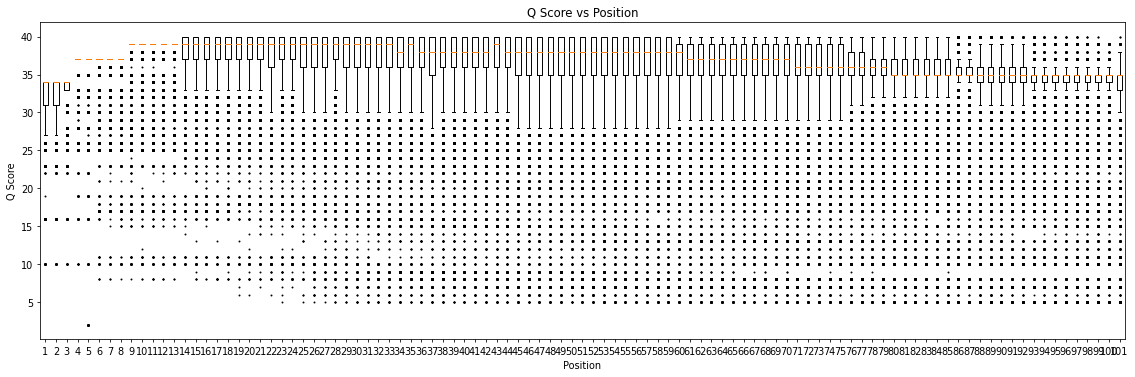

In [5]:
#!/usr/bin/env python3
# Name: Fan Xia (fxia)
# Project Partner: Jorge Gomez Ortega (jgomezor)

'''
Program overview:

Our program takes in a fastq file and creates a box and whiskers plot of the Phred 33 quality 
scores against the nucleotide position within the fragment. The results of this program can 
help users identify the quality of their data as well as what ideal fragment length to use 
when doing sequencing experiments.

Example:

Input in command line: python3 QScorePlot.py <sample_of_choice.fastq

Output: box and whiskers plot
'''


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

class qScore:
    '''creating a new qScore'''
    Qscore = {
        '!': 0,  '"': 1,  '#': 2, '$': 3, '%': 4, '&': 5, "'": 6, '(': 7, ')': 8, 
        '*': 9, '+': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15,  '1': 16, '2': 17, 
        '3': 18, '4': 19, '5': 20, '6':21, '7': 22, '8': 23, '9': 24, ':':25, ';':26,
        '<': 27, '=': 28, '>':29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35,
        'E': 36, 'F': 37, 'G': 38, 'H':39, 'I': 40
        }
    
    def __init__(self):
        '''creating a constructor for the qScore class'''
        self.positions = [[] for pos in range(2000)]
                           
       
    def checkQScore(self, QC=''):
        '''
        method that translates the quality score symbol into a quality 
        score (1-40) and appends it to a list based on position
        '''
        index = 0 
        for char in QC: # loops through every character in the quality score line of the fastq file
            if char in qScore.Qscore.keys(): 
                self.positions[index].append(qScore.Qscore[char])
                index += 1 
            else:
                index += 1
        
        return (self.positions)
    
     
    
    def plot(self):
        '''method that plots the data of the quality scores as a box and whiskers plot'''
        box_plot_data = []
        newPositions = list(filter(([]).__ne__, self.positions)) # filters out empty lists in the self.positions list
        pos = 0
        while pos < len(newPositions): # for every position in the sequence, it adds the list of quality scores to the list of data to be plotted
            box_plot_data.append(newPositions[pos])
            pos += 1
                
        fig = plt.figure(figsize=(20, 6), dpi=70) # adjusting the figure to be a larger size
        ax = fig.add_subplot(111)
        ax.boxplot(box_plot_data, flierprops={'marker': 'o', 'markersize': 1}) # creating a boxplot with our data
        ax.set_title('Q Score vs Position')
        ax.set_xlabel('Position')
        ax.set_ylabel('Q Score')
        plt.show()
        



import sys
class FastQreader:
    '''creating a new FastQreader'''
    def __init__ (self, fname=''):
        '''contructor: saves attribute fname '''
        self.fname = fname
            
    def doOpen (self):
        ''' Handle file opens, allowing STDIN.'''
        if self.fname == '':
            return sys.stdin
        else:
            return open(self.fname)
        
    def readFastq (self):

        '''method that only reads the line of quality scores'''     
        with self.doOpen() as fileH:
            QC = ''
            
            line = fileH.readlines()
            for lineNum in range(len(line)):
                if lineNum%4 == 3:
                    QC = line[lineNum].rstrip()
                    yield QC
        
        
    
def main(inCL=None):
    
    ''' returns the box and whiskers plot of quality scores vs positons '''
    
    myReader = FastQreader(inCL)
    newQScore = qScore()
    for QC in myReader.readFastq():  # checks the quality score for every line in the fastq file
        newQScore.checkQScore(QC)
        
    
    newQScore.plot()  
        


if __name__ == "__main__":
    main('test.fastq')
        